In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://vishwakarmaart.in/al.html'

In [3]:
res = requests.get(url)

In [4]:
res

<Response [200]>

In [7]:
res.headers

{'Connection': 'keep-alive', 'Content-Length': '12106', 'Server': 'GitHub.com', 'Content-Type': 'text/html; charset=utf-8', 'Last-Modified': 'Fri, 01 Mar 2024 11:11:47 GMT', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31556952', 'ETag': 'W/"65e1b7f3-21ae7"', 'expires': 'Sun, 10 Mar 2024 09:31:08 GMT', 'Cache-Control': 'max-age=600', 'Content-Encoding': 'gzip', 'x-proxy-cache': 'MISS', 'X-GitHub-Request-Id': '57D2:324CB:3F5CBE:4A892A:65ED7B84', 'Accept-Ranges': 'bytes', 'Date': 'Sun, 10 Mar 2024 09:24:04 GMT', 'Via': '1.1 varnish', 'Age': '82', 'X-Served-By': 'cache-bom4734-BOM', 'X-Cache': 'HIT', 'X-Cache-Hits': '1', 'X-Timer': 'S1710062644.125201,VS0,VE1', 'Vary': 'Accept-Encoding', 'X-Fastly-Request-ID': '72ad4a56a9d5f136877fbdc9235da68e48ca41b3'}

In [8]:
res.content

b'<!DOCTYPE html>\r\n<html lang="en">\r\n\r\n<head>\r\n  <meta charset="UTF-8">\r\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n\r\n  <!-- \r\n    - primary meta tag\r\n  -->\r\n  <title>Vishwakarma Art</title>\r\n  <meta name="title" content="Vishwakarma Art - Get Quality Furniture">\r\n  <meta name="description" content="MANUFACTURER & SUPPLIERS ALL TYPES OF HANDICRAFT ITEMS">\r\n\r\n  <!-- \r\n    - favicon\r\n  -->\r\n  <link rel="shortcut icon" href="./favicon_io/favicon.ico" type="image/svg+xml">\r\n\r\n  <!-- \r\n    - custom css link\r\n  -->\r\n  <link rel="stylesheet" href="./assets/css/style.css">\r\n    <link rel="stylesheet" href="./assets/css/styless.css">\r\n\r\n\r\n  <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">\r\n\r\n  <!-- \r\n    - google font link\r\n  -->\r\n  <link rel="preconnect" href="https://fonts.google

In [10]:
res.status_code

200

In [11]:
from bs4 import BeautifulSoup as BS

In [12]:
soup = BS(res.text,'html.parser')

In [13]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- 
    - primary meta tag
  -->
<title>Vishwakarma Art</title>
<meta content="Vishwakarma Art - Get Quality Furniture" name="title"/>
<meta content="MANUFACTURER &amp; SUPPLIERS ALL TYPES OF HANDICRAFT ITEMS" name="description"/>
<!-- 
    - favicon
  -->
<link href="./favicon_io/favicon.ico" rel="shortcut icon" type="image/svg+xml"/>
<!-- 
    - custom css link
  -->
<link href="./assets/css/style.css" rel="stylesheet"/>
<link href="./assets/css/styless.css" rel="stylesheet"/>
<link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css" rel="stylesheet"/>
<!-- 
    - google font link
  -->
<link href="https://fonts.googleapis.com" rel="preconnect"/>
<link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>
<link href="https://fonts.googleapis.c

In [14]:
l =[]
for i in soup.find_all('h3' , class_='h3'):
    l.append(i.text[1:-1])

In [16]:
set(l)

{'Bookshelves',
 'Chair',
 'Coffee Table',
 'Dining Table',
 'Mirror with Cabinet',
 'Rocking chair',
 'Shoe Rack',
 'Sideboard',
 'Sideboard Cabinet',
 'Wooden Temple',
 'Wooden chair'}

In [17]:
sd ={}
for i in l:
    if i in sd:
        sd[i]+=1
    else:
        sd[i]=1

In [43]:
num = []
for i in sd.values():
    num.append(i)

In [46]:
nums = []
for i in sd.keys():
    nums.append(i)

In [47]:
d = pd.DataFrame()

In [48]:
d['Product nmae']= nums

In [49]:
d['Count'] = num

In [52]:
print("At home page these products are there..")
d


At home page these products are there..


,Product nmae,Count
0,Rocking chair,1
1,Wooden Temple,1
2,Mirror with Cabinet,4
3,Coffee Table,3
4,Shoe Rack,6
5,Bookshelves,4
6,Chair,3
7,Sideboard,11
8,Sideboard Cabinet,1
9,Dining Table,4


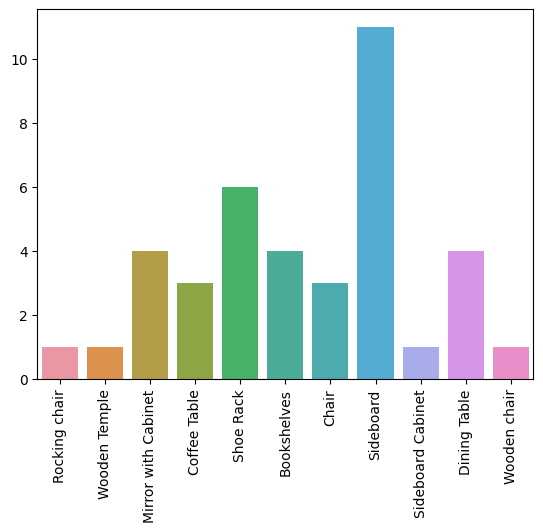

In [54]:
sns.barplot(data = d, x=nums,y=num)
plt.xticks(rotation=90)

plt.show()

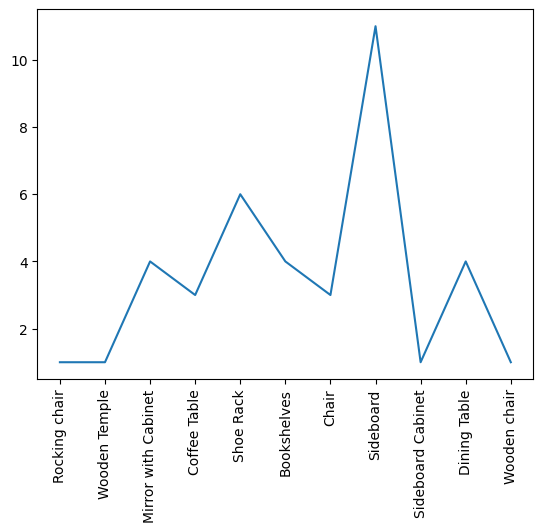

In [56]:

sns.lineplot(data=l,x=nums,y=num)

plt.xticks(rotation=90)
plt.show()

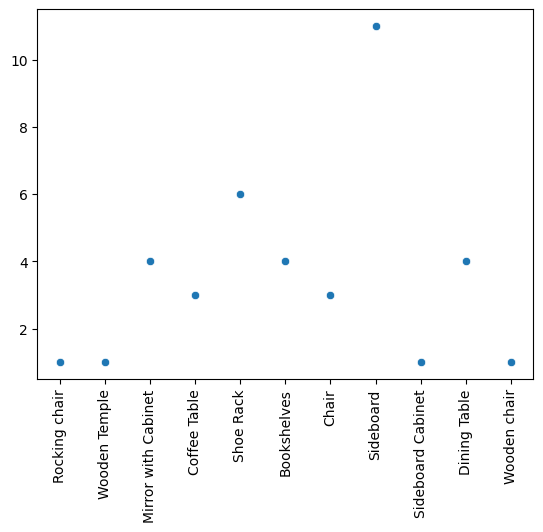

In [57]:
sns.scatterplot(data=l,x=nums,y=num)

plt.xticks(rotation=90)
plt.show()

<Figure size 3000x1000 with 0 Axes>

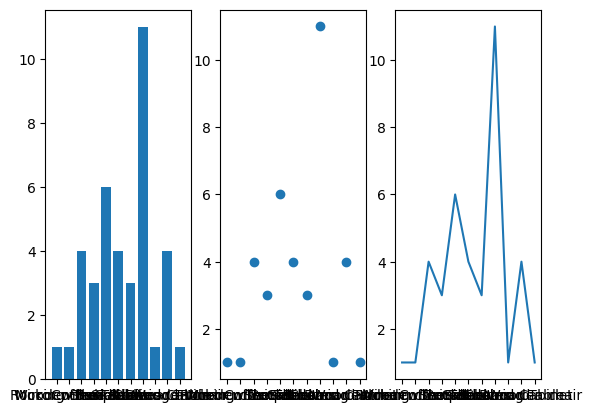

In [58]:
fig = plt.figure(figsize=(30,10))
s,ax = plt.subplots(1,3)
ax[0].bar(nums,num)
ax[1].scatter(nums,num)
ax[2].plot(nums,num)

plt.show()



# find number of producct 

In [59]:
def totals(url):
    resp = requests.get(url)
    data = BS(resp.text)
    con =0
    for i in data.find_all('h3' , class_='h3'):
        con+=1
    return con

In [61]:
print('chair\nwoodentemple\ndiningtable\nbeds\nsideboards\nstudytables\nmirror\nbookshelves\ncoffeetable\nshoeracks' )
n = input("enter product...")

url =f'https://vishwakarmaart.in/{n}'
print(totals(url))

chair
woodentemple
diningtable
beds
sideboards
studytables
mirror
bookshelves
coffeetable
shoeracks
enter product...beds
13


# total number of products..

In [63]:
l =["chair",
"woodentemple",
"diningtable",
"beds",
"sideboards",
"studytables",
"mirror",
"bookshelves",
"coffeetable",
"shoeracks"]

In [68]:
sums =0
for i in l:
    url =f'https://vishwakarmaart.in/{i}'
    sums+=totals(url)
print(f"Total products are {sums}.")    

Total products are 97.


# Price

In [143]:
from bs4 import BeautifulSoup 
url = 'https://vishwakarmaart.in/diningtable.html'

In [144]:
res = requests.get(url)


In [145]:
data =  BeautifulSoup(res.text,'html.parser')

In [157]:
p = []
for i in data.find_all('data',class_='price' ,value="10"):
    p.append(int(i.text[1:].replace('s ','')))

In [158]:
p

[22860,
 93999,
 38899,
 54899,
 40499,
 13999,
 35999,
 28999,
 91999,
 23099,
 63099,
 49099,
 29099,
 27099,
 40909]

In [168]:
# funtion to get the max price
def funs(url,p):
    res = requests.get(url)
    data =  BeautifulSoup(res.text,'html.parser')
    
    for i in data.find_all('data',class_='price' ,value="10"):
        p.append(int(i.text[1:].replace('s ','')))
    return max(p)

print('chair\nwoodentemple\ndiningtable\nbeds\nsideboards\nstudytables\nmirror\nbookshelves\ncoffeetable\nshoeracks' )
n = input("enter product...")

url = f'https://vishwakarmaart.in/{n}.html'
p=[]
print(f"the max price of {n} is {funs(url,p)} Rs.")

chair
woodentemple
diningtable
beds
sideboards
studytables
mirror
bookshelves
coffeetable
shoeracks
enter product...diningtable
the max price of diningtable is 93999 Rs.
